In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
pd.set_option('display.max_rows', 1000) 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('ivf_data.csv') 

# converts valid date entries to date, changes non-valid entries (. and nan) to NaT 
df["DATE"] = pd.to_datetime(df["DATE"], infer_datetime_format=True, errors='coerce') 

 
df = df.iloc[0:314,:] 
print(len(df))

314


In [66]:
df = df[df["BLAST_D8"]!="."]
#df = df[df["AI"]!="."]
#df = df[df["PI"]!="."]
#df = df[df["ALTO"]!="."]
#df = df[df["FRAG_CRO"]!="."]
#delete two outliers
df = df[(df["VCL"] * df["ALH"]) != 9160.5]

In [173]:
df.columns

Index(['NUM', 'DATE', 'SAMPLE', 'REPLICATE', 'ANIMAL', 'BATCH', 'SUB_1_RP',
       'SUB_2_H', 'SUB_3_LS', 'SUB_4_LP', 'AI', 'PI', 'ALTO', 'FRAG_CRO',
       'MOT_PRE', 'MOT_POS', 'CONC_CAMARA', 'VF', 'AD', 'VAP', 'VSL', 'VCL',
       'ALH', 'BCF', 'STR', 'LIN', 'MOTILE_PCT', 'PROGRESSIVE_PCT',
       'RAPID_PCT', 'MEDIUM_PCT', 'SLOW_PCT', 'STATIC_PCT', 'CLIV', 'BLAST_D8',
       'CELLS_COUNT'],
      dtype='object')

In [11]:
from sklearn import preprocessing
def norm(df):
    # Normalises by removing the mean and scaling to unit variance
	scaler = preprocessing.StandardScaler()
	x_scaled = scaler.fit_transform(df)
	df_normalized = pd.DataFrame(x_scaled)
	return df_normalized

In [248]:
df

,NUM,DATE,SAMPLE,REPLICATE,ANIMAL,BATCH,SUB_1_RP,SUB_2_H,SUB_3_LS,SUB_4_LP,...,LIN,MOTILE_PCT,PROGRESSIVE_PCT,RAPID_PCT,MEDIUM_PCT,SLOW_PCT,STATIC_PCT,CLIV,BLAST_D8,CELLS_COUNT
0,1.0,2015-07-16,135,26,PANDIAH,1305,26.32,15.76,21.64,36.29,...,44.0,45.0,37.0,44.0,1.0,6.0,49.0,82.716,33.333,188.750
1,2.0,2015-08-21,180,33,PANDIAH,1305,26.32,15.76,21.64,36.29,...,48.0,74.0,60.0,70.0,4.0,9.0,17.0,79.012,16.049,.
2,3.0,2015-08-28,191,34,PANDIAH,1305,26.32,15.76,21.64,36.29,...,47.0,41.0,30.0,37.0,3.0,26.0,34.0,76.923,20.253,184.500
3,4.0,2015-09-15,205,36,PANDIAH,130503,26.32,15.76,21.64,36.29,...,69.0,50.0,15.0,18.0,31.0,37.0,13.0,77.027,27.027,.
4,5.0,2015-10-01,227,38,PANDIAH,130503,26.32,15.76,21.64,36.29,...,51.0,63.0,54.0,59.0,4.0,16.0,22.0,76.829,39.024,169.500
5,6.0,2015-10-06,233,39,PANDIAH,130503,26.32,15.76,21.64,36.29,...,47.0,59.0,47.0,54.0,5.0,14.0,27.0,66.154,25.806,184.889
6,7.0,2015-10-08,240,40,PANDIAH,130503,26.32,15.76,21.64,36.29,...,60.0,40.0,29.0,31.0,9.0,3.0,57.0,82.192,34.247,207.000
7,8.0,2015-10-20,248,41,PANDIAH,130503,26.32,15.76,21.64,36.29,...,51.0,43.0,32.0,36.0,7.0,20.0,37.0,67.606,23.611,263.500
8,9.0,2015-10-29,261,42,PANDIAH,130503,26.32,15.76,21.64,36.29,...,61.0,43.0,40.0,41.0,2.0,2.0,55.0,61.765,23.529,154.143
9,10.0,2015-11-19,269,43,PANDIAH,130503,26.32,15.76,21.64,36.29,...,64.0,36.0,32.0,34.0,2.0,8.0,56.0,81.690,35.211,.


THIS CODE:
- SEPARATES FEATURES
- ACCURACY FUNCTION: RETURNS ACCURACY IN PREDICTING EACH OF THE LABELS, PLUS TOTAL ACCURACY
- split_and_classify FUNCTION: 
    - Divides the input into train and test, trains a decision tree and predicts labels for test set.  
    - If select == True, calculates accuracy only for those elements where the probability of the label being correct is above a given boundary
    - returns the accuracy for each label + total accuracy
- sandc_average_accuracy FUNCTION:
    - iteratures over the split_and_classify function a number of times (defined by iterations) and returns average accuracy.
- below, a bunch of accuracy tests on different feature sets. Will make into graph at some point

In [30]:
# Isolate motility features and add new ones

# motility features
motility = df.loc[:,["VAP"]]
motility["VSL"] = pd.to_numeric(df["VSL"])
motility["VCL"] = pd.to_numeric(df["VCL"])
motility["ALH"] = pd.to_numeric(df["ALH"])
motility["BCF"] = pd.to_numeric(df["BCF"])
motility["STR"] = pd.to_numeric(df["STR"])
motility["LIN"] = pd.to_numeric(df["LIN"])
motility["VAP"] = pd.to_numeric(motility["VAP"])
motility["WOB"] = (motility["VAP"]/motility["VCL"]) * 100
motility["DNC"] = motility["VCL"] * motility["ALH"] 


#cell_chars = df.loc[:,["AI"]]
#cell_chars["PI"] = pd.to_numeric(df["PI"])
#cell_chars["ALTO"] = pd.to_numeric(df["ALTO"])
#cell_chars["FRAG_CRO"] = pd.to_numeric(df["FRAG_CRO"])
#cell_chars["AI"] = pd.to_numeric(cell_chars["AI"])

# number of fast, slow etc
group_pct = df.loc[:,["MOTILE_PCT"]]
group_pct["PROGRESSIVE_PCT"] = pd.to_numeric(df["PROGRESSIVE_PCT"])
group_pct["RAPID_PCT"] = pd.to_numeric(df["RAPID_PCT"])
group_pct["MEDIUM_PCT"] = pd.to_numeric(df["MEDIUM_PCT"])
group_pct["SLOW_PCT"] = pd.to_numeric(df["SLOW_PCT"])
group_pct["STATIC_PCT"] = pd.to_numeric(df["STATIC_PCT"])
group_pct["MOTILE_PCT"] = pd.to_numeric(group_pct["MOTILE_PCT"])

# number of fast, slow etc - selected features
group_pct2 = df.loc[:,["RAPID_PCT"]]
group_pct2["SLOW_PCT"] = pd.to_numeric(df["SLOW_PCT"])
group_pct2["STATIC_PCT"] = pd.to_numeric(df["STATIC_PCT"])
group_pct2["RAPID_PCT"] = pd.to_numeric(group_pct2["RAPID_PCT"])

# motility features - selected features
motility2 = df.loc[:,["VCL"]]
motility2["LIN"] = pd.to_numeric(df["LIN"])
motility2["DNC"] = pd.to_numeric(motility["DNC"])
motility2["VCL"] = pd.to_numeric(motility["VCL"])

# motility features - selected features 2
motility3 = df.loc[:,["VCL"]]
motility3["DNC"] = pd.to_numeric(motility["DNC"])
motility3["VSL"] = pd.to_numeric(motility["DNC"])
motility3["WOB"] = pd.to_numeric(motility["DNC"])
motility3["VCL"] = pd.to_numeric(motility["VCL"])


# subgroup features
subgroups = df.loc[:,["SUB_1_RP"]]
subgroups["SUB_2"] = pd.to_numeric(df["SUB_2_H"])
subgroups["SUB_3"] = pd.to_numeric(df["SUB_3_LS"])
subgroups["SUB_4"] = pd.to_numeric(df["SUB_4_LP"])
subgroups["SUB_1_RP"] = pd.to_numeric(subgroups["SUB_1_RP"])

# get results
blasrate = pd.to_numeric(df["BLAST_D8"])
cleavage = pd.to_numeric(df["CLIV"])

# blasrate - binary
blasrate_bin = blasrate.copy()
blasrate_bin[blasrate > np.mean(blasrate) ] = "High"
blasrate_bin[blasrate_bin != "High" ] = "Low"
blasrate_bin = blasrate_bin.to_numpy()


# blasrate  - binary for top 25%
blasrate_bin25 = blasrate.copy()
blasrate_bin25np = blasrate_bin25.to_numpy()
best_vals = np.sort(blasrate_bin25np)
print((int(len(blasrate)/4))-1)
print(len(blasrate)-(int(len(blasrate)/4))-1)
for i in best_vals[-(int(len(blasrate)/4))-1:]:
    blasrate_bin25[blasrate_bin25np == i] = "High"
# this loop is adding entries, because sometimes there's no element in number as it's been removed before! check
blasrate_bin25[blasrate_bin25 != "High"] = "Low"
blasrate_bin25 = blasrate_bin25.to_numpy()


#rounded to closest 10
blasrate_10 = np.around(blasrate, decimals=-1)
blasrate_0 = np.around(blasrate, decimals=0)

# cleavage - binary
cleavage_bin = cleavage.copy()
cleavage_bin[cleavage > np.mean(cleavage) ] = "High"
cleavage_bin[cleavage_bin != "High" ] = "Low"
cleavage_bin = cleavage_bin.to_numpy()

    
# create four groups with entries HB/LB = high/low blastocyst rate, HC/LC = high/low cleavage
HB = subgroups[blasrate > np.mean(blasrate)]
LB = subgroups[blasrate <= np.mean(blasrate)]
HC = subgroups[cleavage > np.mean(cleavage)]
LB = subgroups[cleavage <= np.mean(cleavage)]


76
232


In [18]:
motility_norm = norm(motility)
print(motility.mean())
print(motility.std())
motility.std()*100/motility.mean()

VAP      99.355806
VSL      84.225484
VCL     175.859677
ALH       7.437742
BCF      33.843548
STR      83.083871
LIN      49.761290
WOB      56.836519
DNC    1337.930839
dtype: float64
VAP     17.046738
VSL     17.579621
VCL     28.318808
ALH      1.638818
BCF      5.089873
STR      5.767844
LIN      8.821923
WOB      6.751090
DNC    458.348606
dtype: float64


VAP    17.157264
VSL    20.872092
VCL    16.103071
ALH    22.033805
BCF    15.039418
STR     6.942195
LIN    17.728486
WOB    11.878084
DNC    34.258019
dtype: float64

In [6]:
def accuracy(correct, predicted, classes):
    accuracy=[]
    elements = []
    for label in classes:
        accuracy.append(100*np.mean([(x == y)  for x, y in zip(correct,predicted) if x==label]))  
        elements.append(len([(x == y)  for x, y in zip(correct,predicted) if x==label]))
    accuracy.append(100*np.mean([(x == y)  for x, y in zip(correct,predicted)] ) )
    elements.append(len([(x == y)  for x, y in zip(correct,predicted)]))
    accuracy = np.nan_to_num(accuracy) 
    elements = np.nan_to_num(elements)
    return accuracy, elements

# returns matrix where last item is total accuracy (number of correct guesses) and first items
# are accuracy of prediction for each label (in the order they were inputted in classes)

In [21]:
# NOTE! THIS IS ONLY FOR BINARY OUTCOMES
def split_and_classify(data, labels, output_labels = ["High", "Low"],  select = False, boundary = 1, prints = True):
    train, test, output_train, output_test = train_test_split(data, labels, test_size=0.20)
    clf = DecisionTreeClassifier(min_samples_leaf = 6, criterion = "entropy")
    tree_class = clf.fit(train, output_train)
   # export_graphviz(clf, out_file = "decision_tree.dot", class_names = output_labels, feature_names = ["VCL", "LIN", "DNC"])
    # type on command line: dot -Tpng decision_tree.dot -o decision_tree.png
    #print(clf.get_depth(), clf.get_n_leaves())
    results = clf.predict(test)
    #print("importance of each feature:")
    #print(clf.feature_importances_)
    probs = clf.predict_proba(test)
    if select == True:
        results_length = len(results)
        positive = results[np.where(probs[:,0] >= boundary)]
        negative = results[np.where(probs[:,1] >= boundary)]
        results = np.hstack((positive, negative))
        output_test = np.hstack((output_test[np.where(probs[:,0] >= boundary)], output_test[np.where(probs[:,1] >= boundary)]))
        if prints == True:
            print("Elements with certainty within boundary:", len(results), "(", 100* len(results)/results_length, "%)")
    acc, element_num = accuracy(output_test, results, output_labels)
    if prints == True:
        print("Accuracy: (per label and total)")
        print(acc)
    return acc, element_num

In [22]:
def sandc_average_accuracy(data, labels, boundary, iterations = 20, select = True):
    acc, element_num = split_and_classify(data, labels, prints = False)
    all_accs = []
    all_els = []
    for it in range(iterations-1):
        new_acc, new_element_num = split_and_classify(data, labels, boundary = boundary, select = select, prints = False)
        acc = acc + new_acc
        element_num = element_num + new_element_num
        all_accs.append((new_acc))
        all_els.append((new_element_num))
    total_acc = acc/iterations
    total_elements = element_num/iterations
    all_accs = np.asarray(all_accs)
    all_els = np.asarray(all_els)
    print("accuracy is", total_acc, "with std",np.std(all_accs[:,-1]))
    print("elements are", total_elements, "with std",np.std(all_els[:,-1]))
    return total_acc, total_elements

In [23]:
def plot_accuracies(dataset_names, labels, output, boundary_levels):
    fig, axis = plt.subplots(len(boundary_levels),1,figsize=(15,13))
    item = 0
    x = np.arange(len(labels))
    width = 0.25
    
    def autolabel(bar):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in bar:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height,1)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -15),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize = 15)

    for ax, boundary in zip(axis.flat, boundary_levels):
        print(dataset_names[0], boundary)
        final_accuracy, ignore = sandc_average_accuracy(eval(dataset_names[0]), output, select = True, boundary = boundary)
        for subset in dataset_names[1:]:
            new_acc, ignore = sandc_average_accuracy(eval(subset), output, select = True, boundary = boundary)
            final_accuracy = np.vstack((final_accuracy, new_acc))
        bar1 = ax.bar(x-width, final_accuracy[:,2], width, label = "Overall Accuracy (%)")   
        bar2 = ax.bar(x, final_accuracy[:,0], width, label = "True High Predictions (%)")  
        bar3 = ax.bar(x+width, final_accuracy[:,1], width, label = "True Negative Predictions (%)")  
        ax.set_ylim(0,100)
        ax.set_xticks(x)
        ax.set_xticklabels(labels, fontsize = 14)
        ax.legend(loc = 'lower left', fontsize = 14)
        ax.set_title("Accuracy results for boundary = {}".format(boundary), fontsize = 20)
        autolabel(bar1)
        autolabel(bar2)
        autolabel(bar3)
        
    fig.tight_layout()
    plt.show()
        

motility 0.5
accuracy is [72.79318276 66.55293058 69.26169187] with std 4.9504518924792
elements are [30.6 32.9 63.5] with std 1.497920996921864
accuracy is [76.97911841 61.4896619  68.71529992] with std 5.171995079472144
elements are [30.1  35.05 65.15] with std 2.053306231908543
accuracy is [79.69255764 74.33390361 76.85501641] with std 6.802647141780834
elements are [31.05 33.35 64.4 ] with std 2.890427414262312
accuracy is [66.97523851 63.82407174 65.01445828] with std 6.524803749571289
elements are [32.3 32.7 65. ] with std 2.6410356400619746
motility 0.75
accuracy is [77.88214165 74.17110993 75.82380302] with std 7.911634212507975
elements are [22.1  23.35 45.45] with std 5.806673016758021
accuracy is [75.93110023 80.08454196 78.14629722] with std 5.074165358642936
elements are [19.75 21.15 40.9 ] with std 5.011344471017954
accuracy is [87.94564164 85.26498464 86.6840439 ] with std 5.198086272584282
elements are [19.95 22.5  42.45] with std 4.464076370240005
accuracy is [66.18637

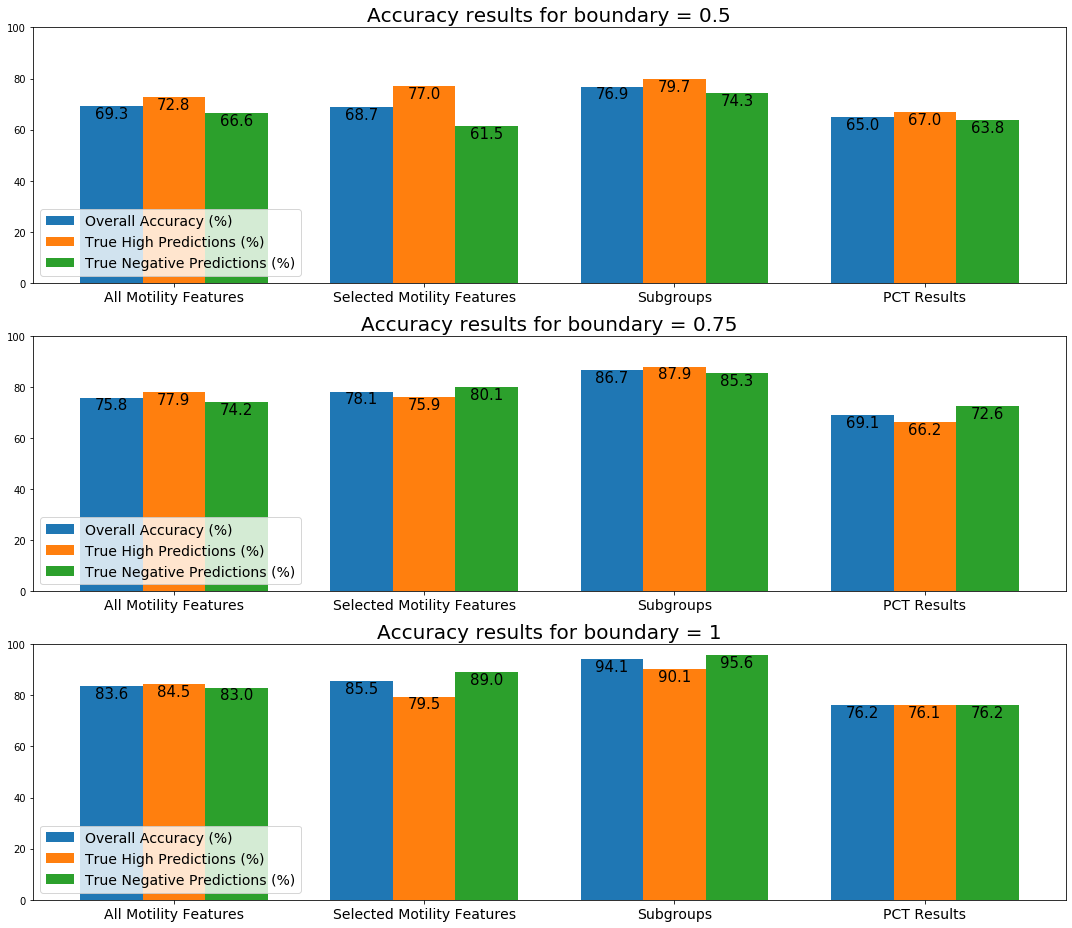

In [10]:
plot_accuracies(["motility", "motility2", "subgroups", "group_pct"], 
                ["All Motility Features", "Selected Motility Features", "Subgroups", "PCT Results"], blasrate_bin, [0.5, 0.75, 1])

In [24]:
def plot_accuracy_vs_elements(dataset_names, labels, output, bound):
    fig, ax = plt.subplots(figsize=(17,12))
    ax2 = ax.twinx()
    x = np.arange(len(labels))
    width = 0.25
    width2 = 0.2
    
    def autolabel(bar, ax):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in bar:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height,1)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -17),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize = 15)

    final_accuracy, final_elements = sandc_average_accuracy(eval(dataset_names[0]), output, select = True, boundary = bound)
    for subset in dataset_names[1:]:
        new_acc, new_elements = sandc_average_accuracy(eval(subset), output, select = True, boundary = bound)
        final_accuracy = np.vstack((final_accuracy, new_acc))
        final_elements = np.vstack((final_elements, new_elements))
    
    bar1 = ax.bar(x-width, final_accuracy[:,2], width, label = "Overall Accuracy")   
    bar2 = ax.bar(x, final_accuracy[:,0], width, label = "True High Predictions")
    bar3 = ax.bar(x+width, final_accuracy[:,1], width, label = "True Negative Predictions")  
    bar1b = ax2.bar(x-width, final_elements[:,2], width2, color = "silver",label = "Elements with total confidence")
    bar2b = ax2.bar(x, final_elements[:,0], width2,color = "silver", label = "Elements predicted True")
    bar3b = ax2.bar(x+width, final_elements[:,1], width2,color = "silver", label = "Elements predicted False")
    ax.set_ylim(0,100)
    ax2.set_ylim(0,40)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize = 14)

    ax.set_title("Accuracy results with boundary = 1, and number of elements correctly classified in each group", fontsize = 20)
    autolabel(bar1, ax)
    autolabel(bar2, ax)
    autolabel(bar3, ax)
    autolabel(bar1b, ax2)
    autolabel(bar2b, ax2)
    autolabel(bar3b, ax2)
    ax.legend(loc = "lower left", fontsize = 14, bbox_to_anchor=(0,-0.2), ncol = 3)
    plt.show()    

accuracy is [80.96185823 81.58693444 80.87195015] with std 6.3856962923282845
elements are [17.1 16.  33.1] with std 4.4404337089462
accuracy is [75.32775558 82.84292243 80.2030936 ] with std 7.127842920617631
elements are [10.9  14.05 24.95] with std 6.521220421782543
accuracy is [90.51835664 95.53214922 93.04789622] with std 7.085001913772142
elements are [10.3 14.1 24.4] with std 3.9645241232139963
accuracy is [76.7577243  80.82962993 79.64352561] with std 11.56449187342615
elements are [10.4 11.8 22.2] with std 5.937346003251526


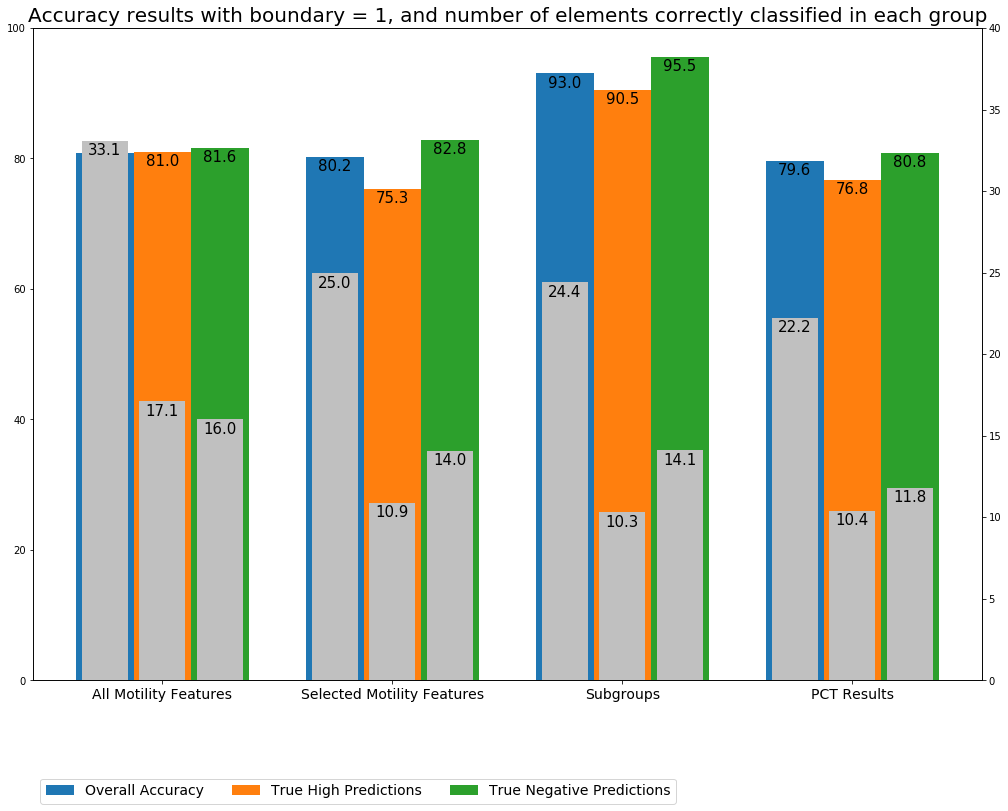

In [31]:
plot_accuracy_vs_elements(["motility", "motility2", "subgroups", "group_pct"], 
                ["All Motility Features", "Selected Motility Features", "Subgroups", "PCT Results"], blasrate_bin, 1)

accuracy is [33.73998918 97.36472756 86.9752174 ] with std 6.191037996560885
elements are [ 6.6  31.15 37.75] with std 5.941543491229509
accuracy is [26.10335498 97.57806709 87.33600157] with std 7.722331230893659
elements are [ 5.45 29.8  35.25] with std 4.99750630335546
accuracy is [25.27777778 98.84528302 96.95461551] with std 3.9903205477745574
elements are [ 1.5  26.15 27.65] with std 4.158227834758669
accuracy is [35.17471417 97.95443833 84.7497376 ] with std 6.123055668505596
elements are [ 7.75 28.55 36.3 ] with std 3.872625713504664


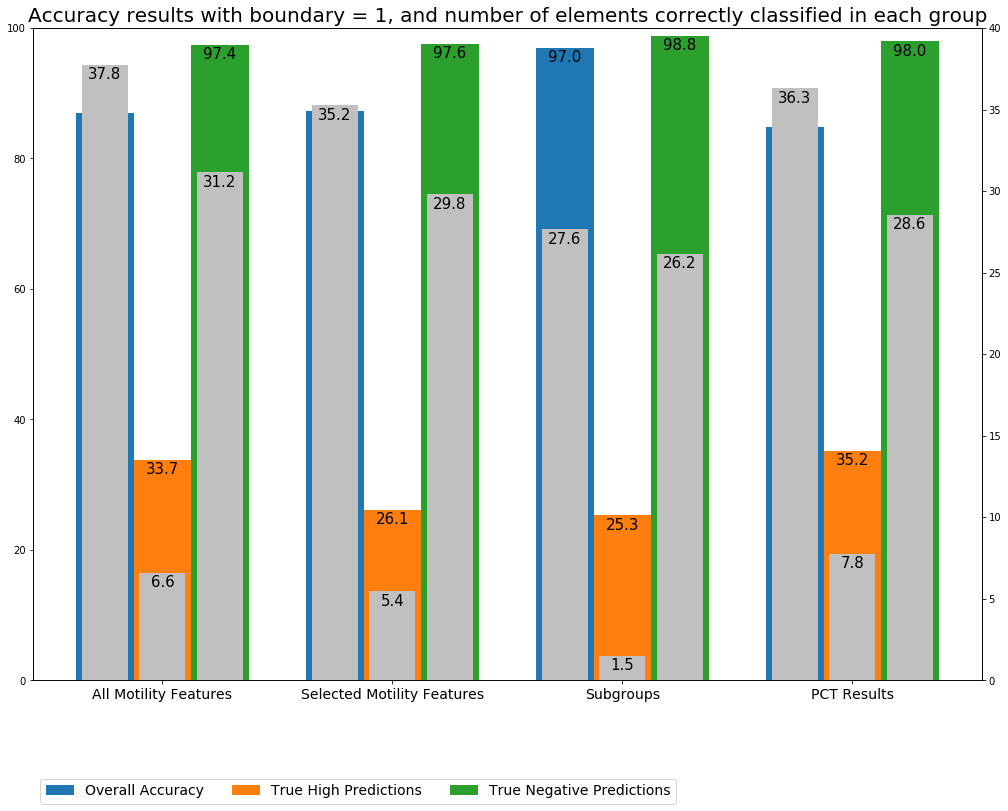

In [26]:
# for top 25% samples in blasrate!!
plot_accuracy_vs_elements(["motility", "motility2", "subgroups", "group_pct"], 
                ["All Motility Features", "Selected Motility Features", "Subgroups", "PCT Results"], blasrate_bin25, 1)

In [9]:
def accuracies_dif_labels(dataset_names, labels, outputA, outputB, bound):
    fig, axis = plt.subplots(2,1,figsize=(15,7))
    x = np.arange(len(labels))
    width = 0.25
    
    def autolabel(bar):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in bar:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height,1)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -15),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize = 15)
    
    for ax, output, name in zip(axis.flat, [outputA, outputB], ["Blastocyte Rate", "Cleavage"]):
        final_accuracy, ignore = sandc_average_accuracy(eval(dataset_names[0]), output, select = True, boundary = bound)
        for subset in dataset_names[1:]:
            new_acc, ignore = sandc_average_accuracy(eval(subset), output, select = True, boundary = bound)
            final_accuracy = np.vstack((final_accuracy, new_acc))
        bar1 = ax.bar(x-width, final_accuracy[:,2], width, label = "Overall Accuracy (%)")   
        bar2 = ax.bar(x, final_accuracy[:,0], width, label = "True High Predictions (%)")  
        bar3 = ax.bar(x+width, final_accuracy[:,1], width, label = "True Negative Predictions (%)")  
        ax.set_ylim(0,100)
        ax.set_xticks(x)
        ax.set_xticklabels(labels, fontsize = 14)
        ax.legend(loc = 'lower left', fontsize = 14)
        ax.set_title("Accuracy results for {} predictions (boundary = 1) ".format(name)) 
        autolabel(bar1)
        autolabel(bar2)
        autolabel(bar3)
        
    fig.tight_layout()
    plt.show()

[78.26964702 86.1938615  82.84280562]
[89.55773393 86.40034855 88.01084724]
[91.90277778 93.97339284 93.48063093]
[78.48819236 83.62321012 81.26228986]
[81.98039461 83.7679951  82.55198887]
[77.5086555  83.57470041 80.3419316 ]
[84.29695305 84.65529079 84.13351142]
[82.83080808 89.73719336 86.37558642]
[85.91214831 79.36736874 83.41623169]
[84.94883904 83.73663224 85.05526562]


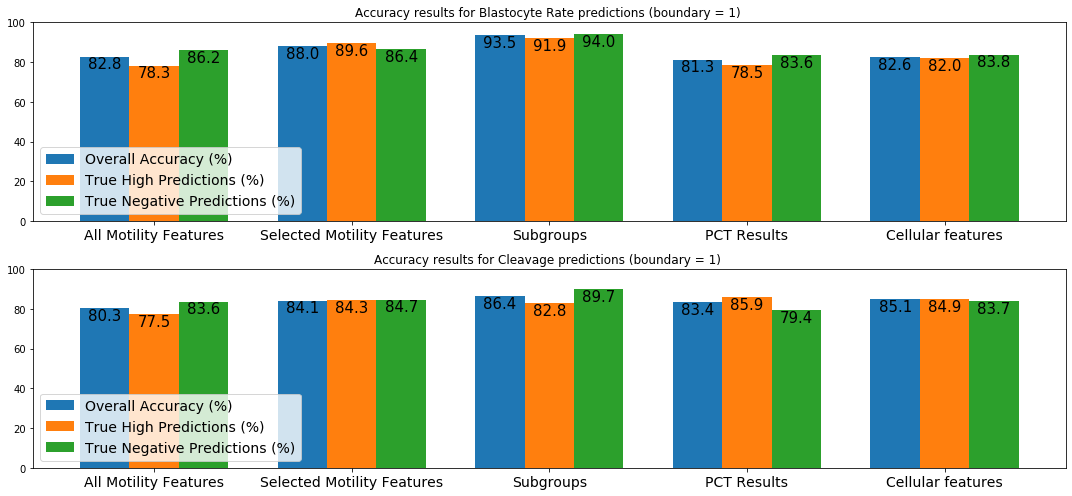

In [371]:
accuracies_dif_labels(["motility", "motility2", "subgroups", "group_pct", "cell_chars"], 
                ["All Motility Features", "Selected Motility Features", "Subgroups", "PCT Results", "Cellular features"], blasrate_bin, cleavage_bin, 1)

In [36]:
def split_and_classify_continuous(data, labels,  select = False, boundary = 1, prints = True):
    train, test, output_train, output_test = train_test_split(data, labels, test_size=0.20)#, random_state = 25)
    clf = DecisionTreeClassifier(min_samples_leaf = 6, criterion = "entropy")
    tree_class = clf.fit(train, output_train)
    output_labels = clf.classes_
    #print(output_labels)
   # export_graphviz(clf, out_file = "decision_tree.dot", class_names = output_labels, feature_names = ["VCL", "LIN", "DNC"])
    # type on command line: dot -Tpng decision_tree.dot -o decision_tree.png
    #print(clf.get_depth(), clf.get_n_leaves())
    results = clf.predict(test)
    #print("importance of each feature:")
    #print(clf.feature_importances_)
    probs = np.array(clf.predict_proba(test))
    acc, element_num = accuracy(output_test, results, output_labels)
    if prints == True:
        print("Accuracy: (per label and total)")
        print(acc)
    return acc, element_num



In [35]:
split_and_classify_continuous(subgroups, blasrate_10)

[ 0. 10. 20. 30. 40. 50.]
Accuracy: (per label and total)
[ 0.         66.66666667 55.55555556 22.22222222  0.          0.
 48.27586207]


(array([ 0.        , 66.66666667, 55.55555556, 22.22222222,  0.        ,
         0.        , 48.27586207]), array([ 1, 24, 18,  9,  5,  1, 58]))

In [37]:
def sandc_continuous_average_accuracy(data, labels, iterations = 20):
    acc, element_num = split_and_classify_continuous(data, labels, prints = False)
    for it in range(iterations-1):
        new_acc, new_element_num = split_and_classify_continuous(data, labels, prints = False)
        acc = acc + new_acc
        element_num = element_num + new_element_num
    total_acc = acc/iterations
    total_elements = element_num/iterations
    print(total_acc)
    return total_acc, total_elements

In [56]:
def plot_accuracies_continuous(dataset_names, labels, output_general, rounding_levels): # THREE ROUNDING LEVELS!
    fig, ax = plt.subplots(1,1,figsize=(15,7))
    item = 0
    x = np.arange(len(labels))
    width = 0.25
    
    def autolabel(bar):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in bar:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height,1)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -15),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize = 15)
    
    for round_base, loc in zip(rounding_levels, [x-1.5*width, x-0.5*width, x+0.5*width, x+1.5*width]):
        output =  round_base * round(output_general / round_base)
        final_accuracy, ignore = sandc_continuous_average_accuracy(eval(dataset_names[0]), output)
        for subset in dataset_names[1:]:
            new_acc, ignore = sandc_continuous_average_accuracy(eval(subset), output)
            final_accuracy = np.vstack((final_accuracy, new_acc))
        bar = ax.bar(loc, final_accuracy[:,-1], width, label = "Accuracy, rounding to nearest {}".format(round_base))     
        autolabel(bar)
    ax.set_ylim(0,75)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize = 14)
    ax.legend(loc = 'lower left', fontsize = 14, bbox_to_anchor=(0,-0.2), ncol =2)
    ax.set_title("OVerall accuracy results (%) when rounding Continuous Variable", fontsize = 20)   
    plt.show()

In [94]:
from sklearn.metrics import mean_absolute_error
def plot_mean_error(dataset_names, labels, output_general, rounding_levels): # THREE ROUNDING LEVELS!
    fig, ax = plt.subplots(1,1,figsize=(15,7))
    item = 0
    x = np.arange(len(labels))
    width = 0.15

    def split_and_classify_continuous2(data, labels,  select = False, boundary = 1, prints = False):
        train, test, output_train, output_test = train_test_split(data, labels, test_size=0.20)#, random_state = 25)
        clf = DecisionTreeClassifier(min_samples_leaf = 6, criterion = "entropy")
        tree_class = clf.fit(train, output_train)
        output_labels = clf.classes_
        results = clf.predict(test)
        error = mean_absolute_error(output_test, results)
        return error
    
    def sandc_continuous_average_accuracy2(data, labels, iterations = 20):
        meanerr = split_and_classify_continuous2(data, labels, prints = False)
        for it in range(iterations-1):
            new_mean = split_and_classify_continuous2(data, labels, prints = False)
            meanerr = meanerr + new_mean
        totalerr = meanerr/iterations
        return totalerr
    
    def autolabel(bar):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in bar:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height,1)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -15),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize = 15)
    
    for round_base, loc in zip(rounding_levels, [x-1.5*width, x-0.5*width, x+0.5*width, x+1.5*width]):
        output =  round_base * round(output_general / round_base)
        meanerr = sandc_continuous_average_accuracy2(eval(dataset_names[0]), output)
        for subset in dataset_names[1:]:
            new_meanerr = sandc_continuous_average_accuracy2(eval(dataset_names[0]), output)
            meanerr = np.vstack((meanerr, new_meanerr))

        bar = ax.bar(loc, meanerr[:,-1], width, label = "Mean error, rounding to nearest {}".format(round_base))     
        autolabel(bar)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize = 14)
    ax.legend(loc = 'lower left', fontsize = 14, bbox_to_anchor=(0,-0.2), ncol =2)
    ax.set_title("Mean error (%) when rounding to intervals", fontsize = 20)   
    plt.show()

    

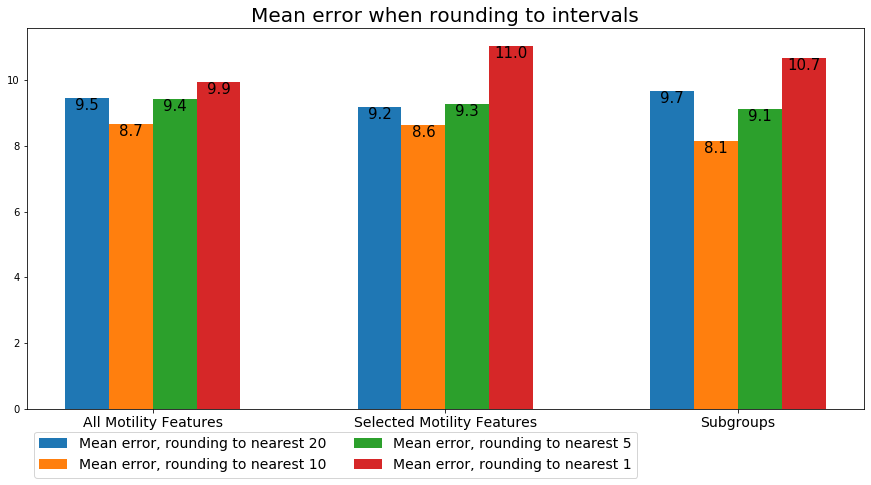

In [95]:
plot_mean_error(["motility", "motility2", "subgroups"], 
                ["All Motility Features", "Selected Motility Features", "Subgroups"], blasrate, [20,10,5,1])

[79.16666667 68.05555556 50.66666667  0.         63.53448276]
[83.33333333 70.27777778 34.66666667  0.         61.20689655]
[40.         76.11111111 26.66666667  0.         58.27586207]
[ 0.         56.25       55.55555556 33.21428571 57.14285714  0.
 47.67241379]
[50.         62.5        63.88888889 28.57142857  0.          0.
 45.68965517]
[ 0.         81.25       38.88888889 21.42857143 57.14285714  0.
 46.55172414]
[ 0.         50.         80.         22.22222222  0.         30.
 16.66666667 16.66666667  0.          0.          0.         27.5862069 ]
[ 0.          0.         60.         33.33333333 14.28571429 70.
 16.66666667  0.          0.          0.          0.         31.03448276]
[  0.         100.          60.          33.33333333  14.28571429
  20.           0.          50.           0.           0.
   0.          29.31034483]
[  0.           0.           0.           0.           0.
   0.           0.           0.         100.          50.
   0.           0.           0.

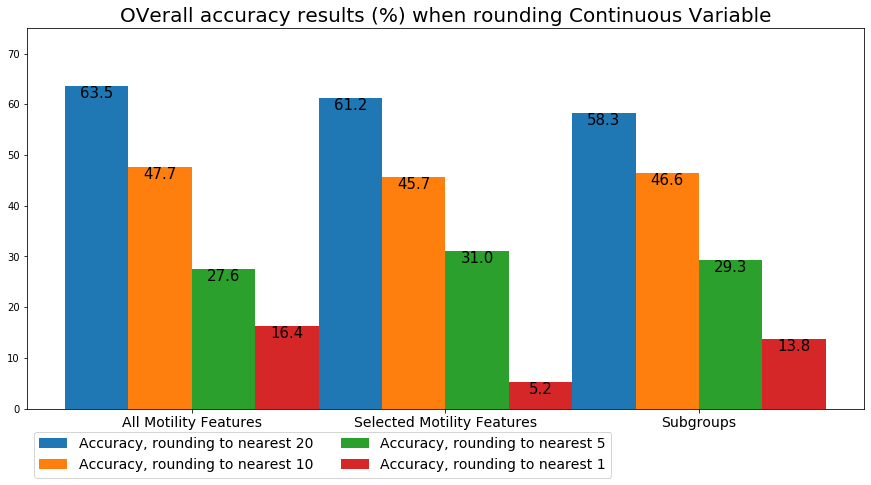

In [57]:
plot_accuracies_continuous(["motility", "motility2", "subgroups"], 
                ["All Motility Features", "Selected Motility Features", "Subgroups"], blasrate, [20,10,5,1])